In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pydataset import data

In [3]:
import sklearn.preprocessing


In [4]:
import wrangle

from wrangle import wrangle_telco
from wrangle import split

# 1. Select a dataset with a continuous target variable

In [5]:
df = pd.read_csv('tips.csv')

In [6]:
df = df.drop(columns = 'Unnamed: 0')

In [7]:
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,tip_percentage,price_per_person
0,16.99,1.01,2,0,0,0,1,0,0,0.059447,8.495000
1,10.34,1.66,3,1,0,0,1,0,0,0.160542,3.446667
2,21.01,3.50,3,1,0,0,1,0,0,0.166587,7.003333
3,23.68,3.31,2,1,0,0,1,0,0,0.139780,11.840000
4,24.59,3.61,4,0,0,0,1,0,0,0.146808,6.147500


In [8]:
df.shape

(244, 11)

# 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   sex_Male          244 non-null    int64  
 4   smoker_Yes        244 non-null    int64  
 5   day_Sat           244 non-null    int64  
 6   day_Sun           244 non-null    int64  
 7   day_Thur          244 non-null    int64  
 8   time_Lunch        244 non-null    int64  
 9   tip_percentage    244 non-null    float64
 10  price_per_person  244 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 21.1 KB


In [10]:
print(df.isnull().sum())

total_bill          0
tip                 0
size                0
sex_Male            0
smoker_Yes          0
day_Sat             0
day_Sun             0
day_Thur            0
time_Lunch          0
tip_percentage      0
price_per_person    0
dtype: int64


In [11]:
train, validate, test = split(df)

In [12]:
train.shape

(136, 11)

In [13]:
validate.shape

(59, 11)

In [14]:
test.shape

(49, 11)

In [15]:
X_train = train.drop(columns=['total_bill'])
y_train = train.total_bill

X_validate = validate.drop(columns=['total_bill'])
y_validate = validate.total_bill

X_test = test.drop(columns=['total_bill'])
y_test = test.total_bill

In [16]:
X_train.shape

(136, 10)

In [17]:
y_train.shape

(136,)

In [18]:
scaler = sklearn.preprocessing.MinMaxScaler()
# scale data
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[0.06444444, 0.2       , 1.        , ..., 1.        , 0.12167745,
        0.2204023 ],
       [0.30555556, 0.6       , 0.        , ..., 0.        , 0.16949864,
        0.19396552],
       [0.20888889, 0.2       , 0.        , ..., 0.        , 0.14015094,
        0.4704023 ],
       ...,
       [0.16666667, 0.2       , 0.        , ..., 1.        , 0.17491882,
        0.30229885],
       [0.55555556, 0.6       , 1.        , ..., 0.        , 0.2216475 ,
        0.30028736],
       [0.04888889, 0.2       , 1.        , ..., 1.        , 0.22948943,
        0.05201149]])

In [20]:
X_train.head()

,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,tip_percentage,price_per_person
224,1.58,2,1,1,0,0,0,1,0.117735,6.710000
157,3.75,4,0,0,0,1,0,0,0.150000,6.250000
229,2.88,2,0,1,1,0,0,0,0.130199,11.060000
65,3.15,3,1,0,1,0,0,0,0.156873,6.693333
214,6.50,3,0,1,1,0,0,0,0.230742,9.390000


# 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

## Baseline

In [21]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)


In [22]:
y_train.head()

,total_bill
224,13.42
157,25.00
229,22.12
65,20.08
214,28.17


In [23]:
# 1. Predict total_pred_mean
total_pred_mean = y_train['total_bill'].mean()
y_train['total_pred_mean'] = total_pred_mean
y_validate['total_pred_mean'] = total_pred_mean

In [24]:
total_pred_mean

19.526911764705886

In [25]:
y_train.head()

,total_bill,total_pred_mean
224,13.42,19.526912
157,25.00,19.526912
229,22.12,19.526912
65,20.08,19.526912
214,28.17,19.526912


In [26]:
# 2. compute G3_pred_median
total_pred_median = y_train['total_bill'].median()
y_train['total_pred_median'] = total_pred_median
y_validate['total_pred_median'] = total_pred_median

In [27]:
total_pred_median

17.490000000000002

In [28]:
y_train.head()

,total_bill,total_pred_mean,total_pred_median
224,13.42,19.526912,17.49
157,25.00,19.526912,17.49
229,22.12,19.526912,17.49
65,20.08,19.526912,17.49
214,28.17,19.526912,17.49


In [29]:
# 3. RMSE of total_pred_mean
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_mean)**1/2
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_mean)**1/2

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  39.91 
Validate/Out-of-Sample:  37.14


In [30]:
# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_median)**1/2
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_median)**1/2

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  41.98 
Validate/Out-of-Sample:  39.31


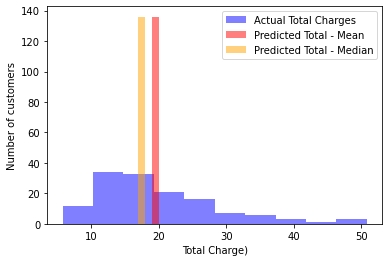

In [31]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.total_bill, color='blue', alpha=.5, label="Actual Total Charges")
plt.hist(y_train.total_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Total - Mean")
plt.hist(y_train.total_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Total - Median")
plt.xlabel("Total Charge)")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

## LinearRegression (OLS)

In [32]:
# create the model object
lm = LinearRegression(normalize=True)

In [33]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.total_bill)


LinearRegression(normalize=True)

In [34]:
# predict train
y_train['total_pred_lm'] = lm.predict(X_train_scaled)

In [35]:
y_train.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm
224,13.42,19.526912,17.49,12.829741
157,25.00,19.526912,17.49,26.069058
229,22.12,19.526912,17.49,23.223497
65,20.08,19.526912,17.49,20.309976
214,28.17,19.526912,17.49,28.820700


In [36]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_lm)**1/2

In [37]:
rmse_train

1.4967667527810955

In [38]:
# predict validate
y_validate['total_pred_lm'] = lm.predict(X_validate_scaled)

In [39]:
y_validate.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm
207,38.73,19.526912,17.49,32.698350
223,15.98,19.526912,17.49,16.982700
33,20.69,19.526912,17.49,23.058074
108,18.24,19.526912,17.49,19.299706
36,16.31,19.526912,17.49,16.949744


In [40]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_lm)**1/2

In [41]:
rmse_validate

2.5714682286286523

In [42]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.4967667527810955 
Validation/Out-of-Sample:  2.5714682286286523


In [43]:
## this model does significantly better than the baseline model

## LassoLars

In [44]:
# create the model object
lars = LassoLars(alpha=1.0)

In [45]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.total_bill)

LassoLars()

In [46]:
# predict train
y_train['total_pred_lars'] = lars.predict(X_train_scaled)

In [47]:
y_train.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm,total_pred_lars
224,13.42,19.526912,17.49,12.829741,19.526912
157,25.00,19.526912,17.49,26.069058,19.526912
229,22.12,19.526912,17.49,23.223497,19.526912
65,20.08,19.526912,17.49,20.309976,19.526912
214,28.17,19.526912,17.49,28.820700,19.526912


In [48]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_lars)**1/2

In [49]:
rmse_train

39.90620626081314

In [50]:
# predict validate
y_validate['total_pred_lars'] = lars.predict(X_validate_scaled)

In [51]:
y_validate.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm,total_pred_lars
207,38.73,19.526912,17.49,32.698350,19.526912
223,15.98,19.526912,17.49,16.982700,19.526912
33,20.69,19.526912,17.49,23.058074,19.526912
108,18.24,19.526912,17.49,19.299706,19.526912
36,16.31,19.526912,17.49,16.949744,19.526912


In [52]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_lars)**1/2

In [53]:
rmse_validate

37.135097091629525

In [54]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  39.90620626081314 
Validation/Out-of-Sample:  37.135097091629525


In [55]:
## this model is not much better than the baseline

## TweedieRegressor (GLM)

In [56]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

In [57]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.total_bill)

TweedieRegressor(alpha=0, power=1)

In [58]:
# predict train
y_train['total_pred_glm'] = glm.predict(X_train_scaled)

In [59]:
y_train.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm,total_pred_lars,total_pred_glm
224,13.42,19.526912,17.49,12.829741,19.526912,12.949774
157,25.00,19.526912,17.49,26.069058,19.526912,24.519590
229,22.12,19.526912,17.49,23.223497,19.526912,21.564048
65,20.08,19.526912,17.49,20.309976,19.526912,18.882255
214,28.17,19.526912,17.49,28.820700,19.526912,26.332236


In [60]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_glm)**1/2

In [61]:
rmse_train

1.8632037016659646

In [62]:
# predict validate
y_validate['total_pred_glm'] = glm.predict(X_validate_scaled)

In [63]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_glm)**1/2

In [64]:
rmse_validate

2.623382347207731

In [65]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  1.8632037016659646 
Validation/Out-of-Sample:  2.623382347207731


In [66]:
## this is significantly better than the baseline model, however it is not better than the OLS model

## Polynomial Regression

### PolynomialFeatures

In [67]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

In [68]:
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

In [69]:
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

### LinearRegression

In [70]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [71]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.total_bill)

LinearRegression(normalize=True)

In [72]:
# predict train
y_train['total_pred_lm2'] = lm2.predict(X_train_degree2)

In [73]:
y_train.head()

,total_bill,total_pred_mean,total_pred_median,total_pred_lm,total_pred_lars,total_pred_glm,total_pred_lm2
224,13.42,19.526912,17.49,12.829741,19.526912,12.949774,13.42
157,25.00,19.526912,17.49,26.069058,19.526912,24.519590,25.00
229,22.12,19.526912,17.49,23.223497,19.526912,21.564048,22.12
65,20.08,19.526912,17.49,20.309976,19.526912,18.882255,20.08
214,28.17,19.526912,17.49,28.820700,19.526912,26.332236,28.17


In [74]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.total_bill, y_train.total_pred_lm2)**1/2

In [75]:
rmse_train

9.15368672447999e-29

In [76]:
# predict validate
y_validate['total_pred_lm2'] = lm2.predict(X_validate_degree2)

In [77]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.total_bill, y_validate.total_pred_lm2)**1/2

In [78]:
rmse_validate

0.01098622994522222

In [79]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  9.15368672447999e-29 
Validation/Out-of-Sample:  0.01098622994522222


In [80]:
## this model is the best so far in terms of residuals left

## Evaluate

### Plotting Actual vs. Predicted Values

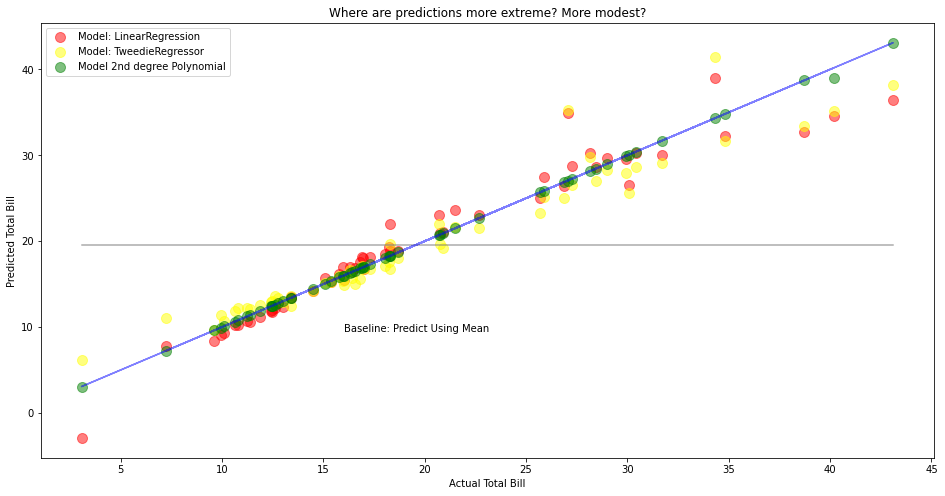

In [81]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.total_bill, y_validate.total_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.total_bill, y_validate.total_bill, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.total_bill, y_validate.total_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.total_bill, y_validate.total_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.total_bill, y_validate.total_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Total Bill")
plt.ylabel("Predicted Total Bill")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Residual Plots: Plotting the Errors in Predictions

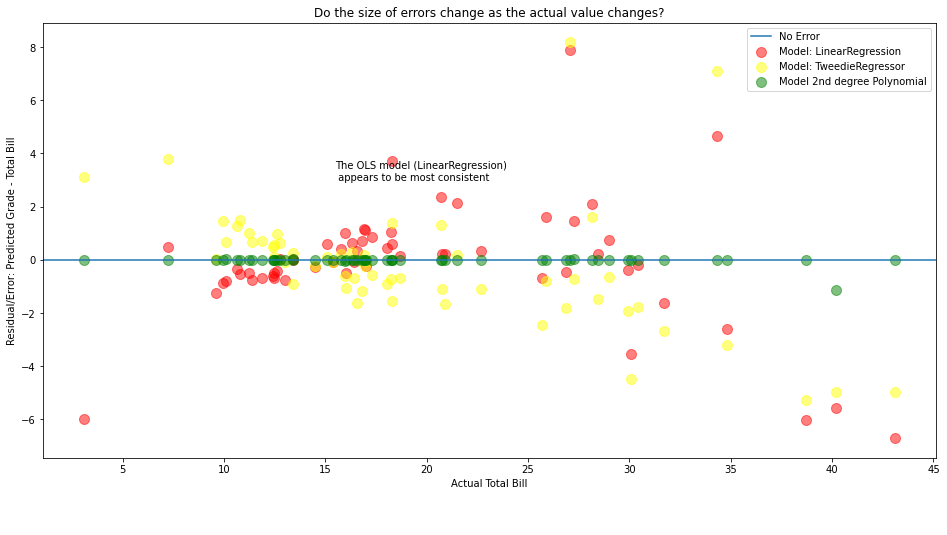

In [82]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.total_bill, y_validate.total_pred_lm-y_validate.total_bill, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.total_bill, y_validate.total_pred_glm-y_validate.total_bill, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.total_bill, y_validate.total_pred_lm2-y_validate.total_bill, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Total Bill")
plt.ylabel("Residual/Error: Predicted Grade - Total Bill")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Histograms

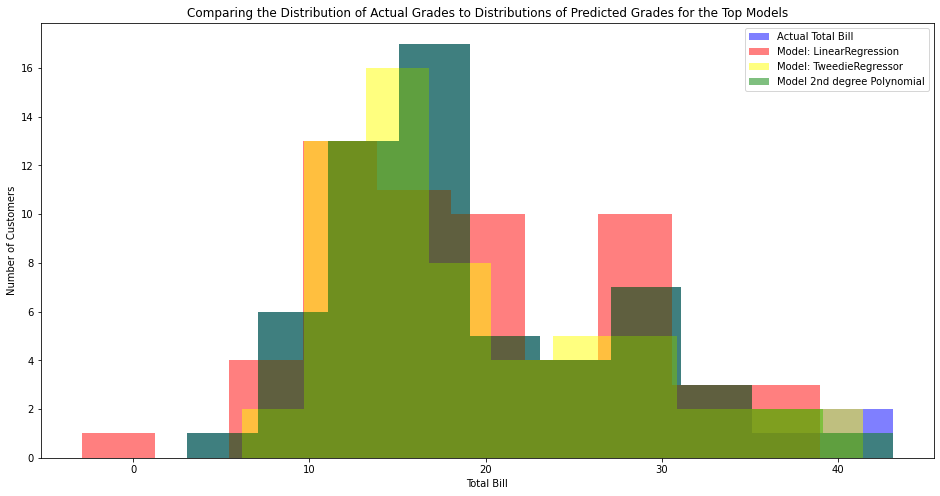

In [83]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.total_bill, color='blue', alpha=.5, label="Actual Total Bill")
plt.hist(y_validate.total_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.total_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.total_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Total Bill")
plt.ylabel("Number of Customers")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

In [84]:
## Polynomial Regression consistantly appears to be the best at predicting the closest to the actual value

## Model Selection & Out-of-Sample Evaluation

In [85]:
y_test = pd.DataFrame(y_test)

In [86]:
y_test.head()

,total_bill
136,10.33
129,22.82
193,15.48
142,41.19
80,19.44


In [87]:
# predict on test
y_test['total_pred_lm2'] = lm2.predict(X_test_degree2)

In [88]:
y_test.head()

,total_bill,total_pred_lm2
136,10.33,10.33
129,22.82,22.82
193,15.48,15.48
142,41.19,41.19
80,19.44,19.44


In [89]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.total_bill, y_test.total_pred_lm2)**1/2

In [91]:
print("RMSE for Polynomial Regression Model \nOut-of-Sample Performance: ", rmse_test)

RMSE for Polynomial Regression Model 
Out-of-Sample Performance:  0.0006998348656593179
